In [2]:
import random
import math    # cos() for Rastrigin
import copy    # array-copying convenience
import sys  
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# fitness functions---------

In [3]:
# rastrigin function
def fitness_rastrigin(position):
  fitnessVal = 0.0
  for i in range(len(position)):
    xi = position[i]
    fitnessVal += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
  return fitnessVal
 
#sphere function
def fitness_sphere(position):
    fitnessVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessVal += (xi*xi);
    return fitnessVal;

In [4]:
#particle class
class Particle:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
 
    # initialize position of the particle with 0.0 value
    self.position = [0.0 for i in range(dim)]
 
     # initialize velocity of the particle with 0.0 value
    self.velocity = [0.0 for i in range(dim)]
 
    # initialize best particle position of the particle with 0.0 value
    self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times to calculate random position and velocity
    # range of position and velocity is [minx, max]
    for i in range(dim):
      self.position[i] = ((maxx - minx) *
        self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) *
        self.rnd.random() + minx)
 
    # compute fitness of particle
    self.fitness = fitness(self.position) # curr fitness
 
    # initialize best position and fitness of this particle
    self.best_part_pos = copy.copy(self.position)
    self.best_part_fitnessVal = self.fitness # best fitness


In [5]:
 # particle swarm optimization function
def pso(fitness, max_iter, n, dim, minx, maxx):
  # hyper parameters
  w = 0.729    # inertia
  c1 = 1.49445 # cognitive (particle)
  c2 = 1.49445 # social (swarm)
 
  rnd = random.Random(0)
 
  # create n random particles
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
 
  # compute the value of best_position and best_fitness in swarm
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # swarm best
 
  # computer best particle of swarm and it's fitness
  for i in range(n): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
  for i in range(n): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
 
  # main loop of pso
  Iter = 0
  while Iter < max_iter:
     
    # after every 10 iterations
    # print iteration number and best fitness value so far
    if Iter % 10 == 0 and Iter > 1:
      print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
 
    for i in range(n): # process each particle
       
      # compute new velocity of curr particle
      for k in range(dim):
        r1 = rnd.random()    # randomizations
        r2 = rnd.random()
     
        swarm[i].velocity[k] = (
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                               )
        


         # if velocity[k] is not in [minx, max]
        # then clip it
        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx
 
 
      # compute new position using new velocity
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
   
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position)
 
      # is new position a new best for the particle?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
    Iter += 1
  #end_while
  return best_swarm_pos
# end pso
 
 
#----------------------------
# Driver code for rastrigin function
 
print("\nBegin particle swarm optimization on rastrigin function\n")
dim = 3
fitness = fitness_rastrigin
 
 


Begin particle swarm optimization on rastrigin function



In [6]:
print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
 
 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)
 
print("\nEnd particle swarm for rastrigin function\n")
 
 
print()
print()
 
 
# Driver code for Sphere function
print("\nBegin particle swarm optimization on sphere function\n")
dim = 3
fitness = fitness_sphere
 
 
print("Goal is to minimize sphere function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
 
 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)
 
print("\nEnd particle swarm for sphere function\n")

Goal is to minimize Rastrigin's function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Setting num_particles = 50
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 best fitness = 8.463
Iter = 20 best fitness = 4.792
Iter = 30 best fitness = 2.223
Iter = 40 best fitness = 0.251
Iter = 50 best fitness = 0.251
Iter = 60 best fitness = 0.061
Iter = 70 best fitness = 0.007
Iter = 80 best fitness = 0.005
Iter = 90 best fitness = 0.000

PSO completed


Best solution found:
['0.000618', '0.000013', '0.000616']
fitness of best solution = 0.000151

End particle swarm for rastrigin function




Begin particle swarm optimization on sphere function

Goal is to minimize sphere function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Setting num_particles = 50
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 best fitness = 0.189
Iter = 20 best fitness = 0.012
Iter = 30 best fitness = 0.001
Iter = 40 best fitness = 0.000
Iter = 50 best fitness = 0.000
Iter = 

Solution: [-0.000796    0.01358871]
Fitness: 0.0004169578859887224


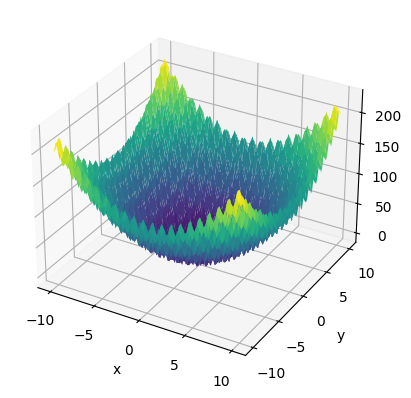

In [12]:
# Define the Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

# Define the PSO algorithm
def pso(cost_func, dim=2, num_particles=50, max_iter=100,w = 0.729,c1 = 1.49445,c2 = 1.49445):
    # Initialize particles and velocities
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles += velocities

        # Evaluate fitness of each particle
        fitness_values = np.array([cost_func(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, swarm_best_fitness

# Define the dimensions of the problem
dim = 2

# Run the PSO algorithm on the Rastrigin function
solution, fitness = pso(rastrigin, dim=dim)

# Print the solution and fitness value
print('Solution:', solution)
print('Fitness:', fitness)

# Create a meshgrid for visualization
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

# Create a 3D plot of the Rastrigin function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the solution found by the PSO algorithm
ax.scatter(solution[0], solution[1], fitness, color='red')
plt.show()